#Importing Libraries

In [ ]:
import numpy as np
import numpy.random as nr
import numpy.linalg as nl
import matplotlib.pyplot as plt

#Defining Required functions

In [ ]:
def Dmatrix(K):
    var_nr = (10**(8/10))**2; mean_nr = 3;
    mu_nr = np.log10(mean_nr**2/np.sqrt(var_nr+mean_nr**2));
    sigma_nr = np.sqrt(np.log10(var_nr/(mean_nr**2+1)));
    nr = np.random.lognormal(mu_nr,sigma_nr,K);
    dr = np.random.randint(100,1000,K)/100;
    beta = nr/dr**3.0;
    return beta;

def channel(G):
    return np.conj(np.transpose(G));


#Calculating the rates for MRC and ZF

In [ ]:
ITER = 20000;
K = 10; # number of users
Mv = np.arange(20,520,30); # number of BS antennas
Eu_dB = 10;  Eu = 10**(Eu_dB/10);
rate_MRC = np.zeros(len(Mv)) ;
bound_MRC = np.zeros(len(Mv));
rate_ZF = np.zeros(len(Mv));

beta = Dmatrix(K);
sqrtD = np.diag(np.sqrt(beta));



for it in range(ITER):
    # print(it)
    for mx in range(len(Mv)):
      M=Mv[mx]
      # pu=Eu
      pu=Eu/M
      H=(nr.normal(0,1,(M,K))+1j*nr.normal(0,1,(M,K)))/np.sqrt(2)
      G=np.matmul(H,sqrtD)
      g0=G[:,0] #Column of user 0
      MRCbf=g0/nl.norm(g0)
      nr_MRC = pu*nl.norm(g0)**2
      mu_int =np.matmul(channel(MRCbf),G[:,1:])
      dr_MRC = 1+pu*nl.norm(mu_int)**2
      rate_MRC[mx]+=np.log2(1+nr_MRC/dr_MRC)

      nr_bound_MRC = pu*M*beta[0]
      dr_bound_MRC =1+pu*np.sum(beta[1:])
      bound_MRC[mx]+=np.log2(1+nr_bound_MRC/dr_bound_MRC)

      GG=np.matmul(channel(G),G)
      nr_ZF =pu; invGG= nl.inv(GG)
      dr_ZF =np.real(invGG[0,0])
      rate_ZF[mx]+=np.log2(1+nr_ZF/dr_ZF)




rate_MRC = rate_MRC/ITER;
bound_MRC = bound_MRC/ITER;
rate_ZF = rate_ZF/ITER;


# Plot for No power Scaling pu=Eu

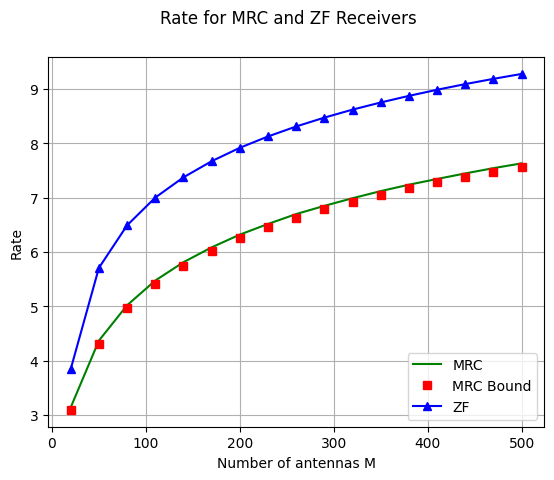

In [ ]:
plt.plot(Mv, rate_MRC,'g-');
plt.plot(Mv, bound_MRC,'rs');
plt.plot(Mv, rate_ZF,'b^-');
plt.grid(1,which='both')
plt.legend(["MRC", "MRC Bound", "ZF"], loc ="lower right");
plt.suptitle('Rate for MRC and ZF Receivers')
plt.ylabel('Rate')
plt.xlabel('Number of antennas M')
plt.show()

#plot With Power Scaling pu=Eu/M

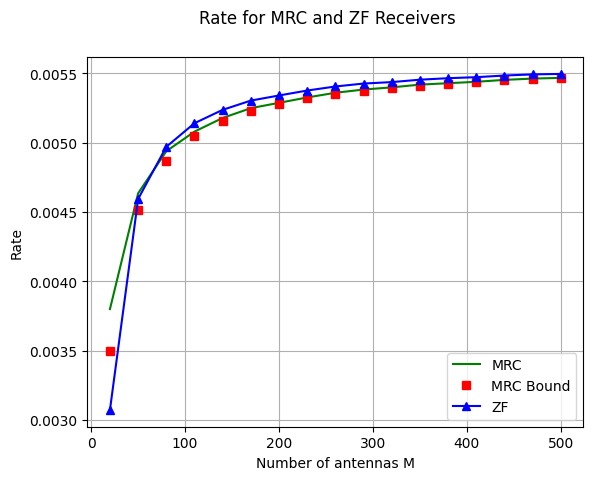

In [ ]:
plt.plot(Mv, rate_MRC,'g-');
plt.plot(Mv, bound_MRC,'rs');
plt.plot(Mv, rate_ZF,'b^-');
plt.grid(1,which='both')
plt.legend(["MRC", "MRC Bound", "ZF"], loc ="lower right");
plt.suptitle('Rate for MRC and ZF Receivers')
plt.ylabel('Rate')
plt.xlabel('Number of antennas M')
plt.show()